### Imports

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### Data Integration

In [22]:

print("Merging results for data integration...")
# df1 = pd.read_excel("../Results/T_out1.xlsx")
# df2 = pd.read_excel("../Results/T_out2.xlsx")
# df3 = pd.read_excel("../Results/T_out3.xlsx")
# df4 = pd.read_excel("../Results/T_out4.xlsx")
# df5 = pd.read_excel("../Results/T_out5.xlsx")
# df6 = pd.read_excel("../Results/T_out6.xlsx")
# df7 = pd.read_excel("../Results/T_out7.xlsx")
# df8 = pd.read_excel("../Results/T_out8.xlsx")
# df9 = pd.read_excel("../Results/T_out9.xlsx")
# df10 = pd.read_excel("../Results/T_out10.xlsx")
# df11 = pd.read_excel("../Results/T_out11.xlsx")
# df12 = pd.read_excel("../Results/T_out12.xlsx")
# df13 = pd.read_excel("../Results/T_out13.xlsx")
# df14 = pd.read_excel("../Results/T_out14.xlsx")

# data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14])

data = pd.read_excel("../Results/ML_input.xlsx")
print('Done.')


Merging results for data integration...
Done.


## Data Cleaning

In [23]:

print('Performing data cleaning...')
print('Inicial shape: ', data.shape)
print(data.columns)
# Rellenamos los espacios vacíos con cero
data = data.fillna(0)

# Elimino la columna de nombre del TIU
data = data.drop(['TIU'], axis=1)

# Eliminamos la fila de bin 1 ya es un bin de resultado positivo
data = data.drop(['1'], axis=1)

# Elimino las columnas que tengan socketing mejor a 30
index = data[data["Socketing"]<30].index
data = data.drop(index)
index = 0

# Elimino las colunas que no tengan algun valor mayor a 5
for col in data.columns:
    good_flag = 0
    for n in data.loc[:,col]:
        if(int(n) >= 5):
            good_flag = 1
    if((not good_flag) and (col != 'G/B_flag')):
        data = data.drop([col], axis=1)

print('Final Shape: ', data.shape)


Performing data cleaning...
Inicial shape:  (57893, 46)
Index(['Socketing', 'TIU', 'G/B_flag', 'Test_Time', 'Bines_General',
       'Bines_NLot', '1', '8', '9', '10', '11', '13', '14', '15', '18', '19',
       '20', '27', '28', '31', '35', '36', '41', '42', '43', '44', '46', '47',
       '48', '51', '54', '56', '60', '62', '64', '68', '90', '92', '94', '97',
       '98', '99', '21', '53', '67', '69'],
      dtype='object')
Final Shape:  (38106, 41)


In [24]:
data.describe().round(3)

,Socketing,G/B_flag,Test_Time,Bines_General,Bines_NLot,8,9,10,11,13,...,64,68,90,92,94,97,98,99,53,67
count,38106.000,38106.000,38106.000,38106.000,38106.000,38106.000,38106.000,38106.000,38106.000,38106.000,...,38106.000,38106.000,38106.000,38106.000,38106.000,38106.000,38106.000,38106.000,38106.000,38106.000
mean,704.227,0.824,159.838,484.607,18.753,2.017,2.295,0.612,0.405,11.363,...,0.300,0.885,0.071,0.211,7.648,1.001,0.573,1.035,0.049,0.004
std,886.803,0.381,35.473,733.978,10.581,4.248,4.052,1.709,1.226,17.262,...,0.882,3.209,0.328,1.896,11.994,5.953,2.204,3.435,0.286,0.105
min,30.000,0.000,0.565,1.000,0.500,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,156.000,1.000,141.172,76.000,14.333,0.000,0.000,0.000,0.000,2.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,402.500,1.000,171.549,216.000,17.857,1.000,1.000,0.000,0.000,5.000,...,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000
75%,921.000,1.000,177.258,583.000,20.714,2.000,3.000,1.000,0.000,13.000,...,0.000,1.000,0.000,0.000,9.000,0.000,0.000,1.000,0.000,0.000
max,14540.000,1.000,807.125,11939.000,366.000,202.000,90.000,73.000,44.000,307.000,...,32.000,212.000,7.000,102.000,333.000,246.000,109.000,178.000,6.000,5.000


### Reducción de dimensionalidad
Se busca correlation de los datos para reducir las dimensiones, recordando que para naive bayes lo mejor es que las características sean independientes entre si.

               Socketing  G/B_flag  Test_Time  Bines_General  Bines_NLot  \
Socketing       1.000000 -0.253897   0.016630       0.788026    0.300498   
G/B_flag       -0.253897  1.000000   0.024153      -0.212505   -0.055900   
Test_Time       0.016630  0.024153   1.000000      -0.013583    0.040548   
Bines_General   0.788026 -0.212505  -0.013583       1.000000    0.110891   
Bines_NLot      0.300498 -0.055900   0.040548       0.110891    1.000000   
8               0.475464 -0.205966  -0.011355       0.431825    0.117158   
9               0.685922 -0.186364  -0.010819       0.641081    0.146766   
10              0.438834 -0.127105  -0.073278       0.409507    0.072740   
11              0.344055 -0.124289   0.012749       0.287197    0.088342   
13              0.593419 -0.317612  -0.010843       0.525852    0.147521   
14              0.845508 -0.198789   0.017942       0.745469    0.239386   
15              0.394204 -0.258428  -0.036893       0.353781    0.125626   
18          

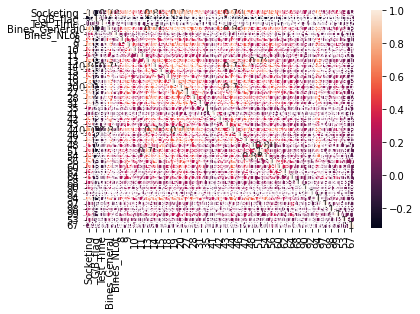

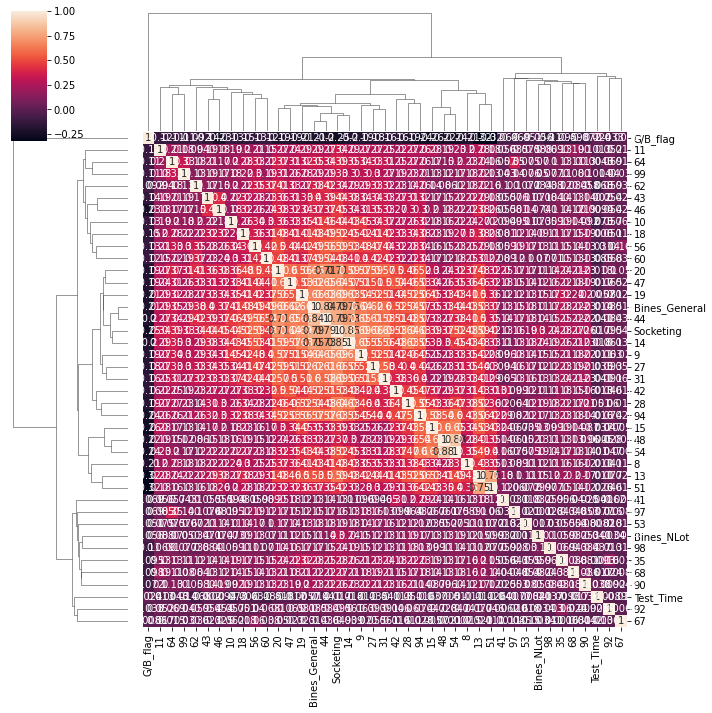

In [25]:
# calculate the correlations
correlations = data.corr()
print(correlations)
correlations.to_excel("Correlation.xlsx")
# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)


Relaciones altas encontradas entre bines:

- bin 51 y bin13: 0.75
- Bin 44 y bin 14: 0.73
- Bin 44 y Bin 20: 0.71
- Bin54 y Bin48: 0.88

Por experiencia del proceso sabemos que tanto el bin 13 como el 51 están asociados a fallos en este colateral por lo que decido dejar ambos como naive asumption
se ve que el bin 44 representa bien la dinámica del bin 14 y el 20 por lo tanto se deja solo en 44
y también por proceso sabemos que el bin54 está asociado a la TIU por lo tanto se eliminará el bin 48.

In [26]:
data = data.drop(['20'], axis=1)
data = data.drop(['14'], axis=1)
data = data.drop(['48'], axis=1)

print('Nueva dimension: ', data.shape)

Nueva dimension:  (38106, 38)


### Data Normalization

In [29]:
print('Begining with data normalization...')
Scaler = StandardScaler()
buffer = data.copy()
# data = data.drop(['G/B_flag'], axis=1)
columnas = data.columns
data = pd.DataFrame(Scaler.fit_transform(data), columns=columnas)
data.iloc[:,2] = buffer.iloc[:,2]
print(data)


Begining with data normalization...
       Socketing  G/B_flag  Test_Time  Bines_General  Bines_NLot         8  \
0       0.102361  0.461966   0.379760      -0.574421    1.204700 -0.239461   
1       0.998852  0.461966  -0.656478      -0.468150    2.669575 -0.239461   
2       1.895342  0.461966   0.304494      -0.379590    3.094861 -0.239461   
3       2.792960  0.461966   0.347552      -0.237894    3.110644 -0.239461   
4       3.689451  0.461966   0.860537      -0.079849    3.260251 -0.004071   
...          ...       ...        ...            ...         ...       ...   
38101   1.479235  0.461966   0.428068       2.089182    0.010119 -0.474851   
38102   2.238151  0.461966   0.923168       3.007479    0.006811 -0.004071   
38103   2.995939  0.461966  -0.783285       3.924412    0.087426 -0.004071   
38104   4.512644 -2.164663  -0.565208       5.751467    0.136476  0.702100   
38105   1.559299  0.461966  -0.251870       2.183192    0.088466  0.937490   

              9        10  

Guardar resultados finales

In [ ]:
# creating a new excel file and save the data
data.to_excel("../Results/ML_input_1.xlsx", index=False)